## Calculate Euclidean distance to products

In [2]:
# lets use pandas to load the dataset!
import pandas as pd

data = pd.read_csv('cereal_labeled.csv')
data.head()

,A,B,name,y
0,0.320354,0.761119,100% Bran,0
1,-0.039224,0.648311,100% Natural Bran,0
2,0.821615,-0.250014,All-Bran,1
3,1.027443,0.091117,All-Bran with Extra Fiber,1
4,-0.097316,0.179982,Almond Delight,0


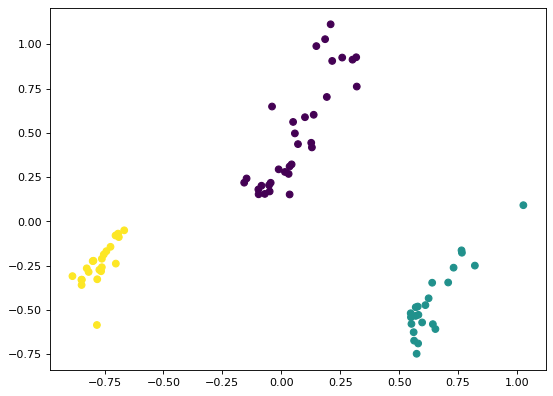

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(data.A, data.B, c = data.y)


In [23]:
ttrb = data[(data['A'] <= -0.75) & (data['B'] <= -0.50) ]
ttrb

,A,B,name,y
70,-0.782537,-0.585419,Total Raisin Bran,2


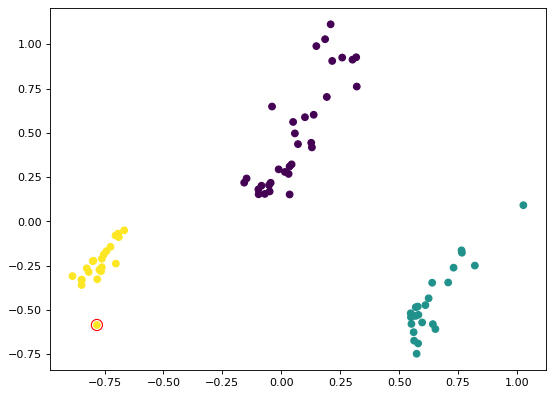

In [40]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(data.A, data.B, c = data.y)
plt.scatter(ttrb.A,ttrb.B, marker = 'o', s=100, linewidth=1, facecolors='none', edgecolors='r')

In [67]:
# euclidean disctance algorithm:

import numpy as np

def Distance(x1,x2,c1,c2):
    X1 = x1
    X2 = x2
    SquareDiff_X1 = (c1 - X1)**2
    SquareDiff_X2 = (c2 - X2)**2
    Sum_X1_X2 = SquareDiff_X1 + SquareDiff_X2
    Euclidean_Distance = np.sqrt(Sum_X1_X2)
    return Euclidean_Distance

float(Distance(ttrb.A,ttrb.B, 0.25, 0.1))

1.2393276149185195

In [70]:
dist = [float(Distance(ttrb.A,ttrb.B, A, B)) for A,B in zip(data.A, data.B)]

dist[:10]

[1.7405560827312199,
 1.4403484452068132,
 1.6388415303130046,
 1.9322861896631052,
 1.027310781923965,
 0.36304005951120555,
 1.3538258193319526,
 0.30416669906528826,
 1.2123968423161617,
 1.3558874797763965]

In [72]:
data_recomm = data.copy()
data_recomm['close'] = dist

data_recomm.head(10)

,A,B,name,y,close
0,0.320354,0.761119,100% Bran,0,1.740556
1,-0.039224,0.648311,100% Natural Bran,0,1.440348
2,0.821615,-0.250014,All-Bran,1,1.638842
3,1.027443,0.091117,All-Bran with Extra Fiber,1,1.932286
4,-0.097316,0.179982,Almond Delight,0,1.027311
5,-0.797336,-0.222681,Apple Cinnamon Cheerios,2,0.363040
6,0.570313,-0.534022,Apple Jacks,1,1.353826
7,-0.764793,-0.281771,Basic 4,2,0.304167
8,0.035229,0.309659,Bran Chex,0,1.212397
9,0.129980,0.417448,Bran Flakes,0,1.355887


In [73]:
# sort dataframe by closeness and select top 5

In [76]:
data_recomm = data_recomm.sort_values(by='close', ascending=True)
data_recomm.head(10)

,A,B,name,y,close
70,-0.782537,-0.585419,Total Raisin Bran,2,0.000000
31,-0.847496,-0.359557,Golden Grahams,2,0.235018
69,-0.781149,-0.327121,Total Corn Flakes,2,0.258303
18,-0.846576,-0.329661,Count Chocula,2,0.263653
14,-0.848137,-0.329732,Cocoa Puffs,2,0.263968
12,-0.886334,-0.309535,Cinnamon Toast Crunch,2,0.294764
42,-0.817588,-0.285800,Lucky Charms,2,0.301662
7,-0.764793,-0.281771,Basic 4,2,0.304167
36,-0.772120,-0.273806,Honey Nut Cheerios,2,0.311787
73,-0.825630,-0.265390,Trix,2,0.322918


In [81]:
top5 = data_recomm.iloc[1:6, :].copy()
top5

,A,B,name,y,close
31,-0.847496,-0.359557,Golden Grahams,2,0.235018
69,-0.781149,-0.327121,Total Corn Flakes,2,0.258303
18,-0.846576,-0.329661,Count Chocula,2,0.263653
14,-0.848137,-0.329732,Cocoa Puffs,2,0.263968
12,-0.886334,-0.309535,Cinnamon Toast Crunch,2,0.294764


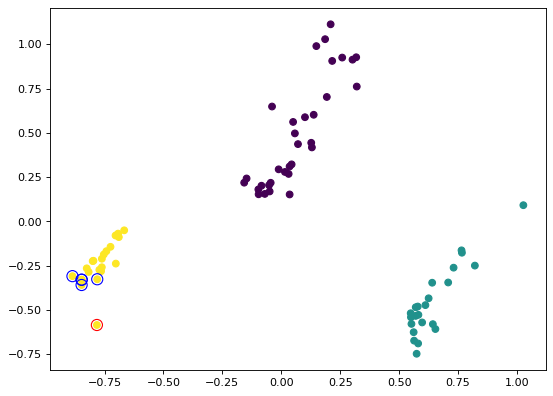

In [83]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(data.A, data.B, c = data.y)
plt.scatter(ttrb.A,ttrb.B, marker = 'o', s=100, linewidth=1, facecolors='none', edgecolors='r')
for a,b in zip(top5.A, top5.B):
    plt.scatter(a,b, marker = 'o', s=100, linewidth=1, facecolors='none', edgecolors='b')

In [86]:
print("If you like Total Raisin Bran you might also like")
for n in top5.name:
    print(n)

If you like Total Raisin Bran you might also like
Golden Grahams
Total Corn Flakes
Count Chocula
Cocoa Puffs
Cinnamon Toast Crunch
